In [7]:
!pip install catboost

In [9]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

CatBoost R²: 0.1486


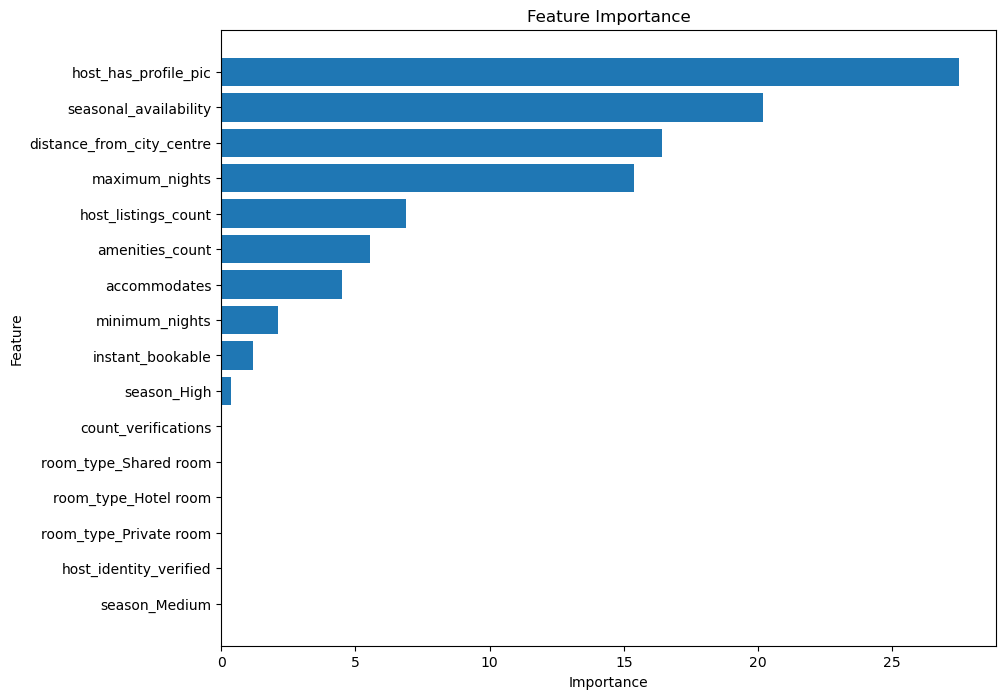

                      Feature  Importance
1        host_has_profile_pic   27.503599
9       seasonal_availability   20.181253
10  distance_from_city_centre   16.406879
5              maximum_nights   15.361885
0         host_listings_count    6.873002
7             amenities_count    5.532186
3                accommodates    4.486792
4              minimum_nights    2.107843
6            instant_bookable    1.191621
15                season_High    0.346922


In [16]:

# loading the data
data_path = 'C:/Users/filip/OneDrive - Vysoká škola ekonomická v Praze/Plocha/DATA X/data_for_model.pck'
data = pd.read_pickle(data_path)

# Assume 'price' is the target variable for prediction
target_variable = 'price'  # Replace with actual target variable name if different


# drop rows with missing target variable values
data = data.dropna(subset=[target_variable])
data = data.drop(columns=['host_id'])

#
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# remove columns with any missing values
X = X.dropna(axis=1, how='any')

# one hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# catboost with best hyperparameters
cb = CatBoostRegressor(iterations=100, depth=8, learning_rate=0.01, l2_leaf_reg=1, verbose=0)
cb.fit(X_train, y_train)

# Predictions for the test set
y_pred_cb = cb.predict(X_test)

# Calculate metrics for the CatBoost model
r2_cb = r2_score(y_test, y_pred_cb)

print(f'CatBoost R²: {r2_cb:.4f}')

# Display feature importances
importances = cb.get_feature_importance()
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Return the feature importances
print(feature_importances.head(10))



In [14]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

cb_grid = CatBoostRegressor(verbose=0)
grid_search = GridSearchCV(estimator=cb_grid, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'depth': 8, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best score: -1643937520.1060743
